In [67]:
## MP 573 Lecture 22: Conditional and Joint Probabilities
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal
import pywt as wt
from skimage.data import shepp_logan_phantom
import scipy.stats as stats

font = {'weight' : 'normal',
        'size'   : 18}

np.set_printoptions(precision=5)
np.set_printoptions(suppress=True)


<style>
td {
  font-size: 50px
}
</style>

## Joint distributions

### Discrete: 

Given two discrete random variables $X$ and $Y$, which are defined a probability space, their joint probability distribution describes the probability that each of them takes on specific discrete values.  This probability distribution can be expressed in terms of a joint probability mass function (PMF).

$$p_{X,Y}(x,y) = P(X = x, Y = y)$$
which is also inherently normalized:

$$\sum_i \sum_j p_{X,Y}(x_i,y_i) = 1$$


Importantly, these definitions for two-random variable (bivariate) distributions extend readily to the case with more than two random variables. 


### Continuous: 
Given two continuous random variables $X$ and $Y$, which are defined a probability space, their joint probability distribution describes the probability that each of them falls within a range of values.  This probability distribution can be expressed in terms of a joint cumulative distribution function (CDF), and often also in terms of a joint probability density function (PDF). 

The joint CDF $F_{X,Y}$ is defined as:

$$F_{X,Y}(x,y) = P(X\leq x,Y\leq y) $$
i.e., the probability that $X\leq x$ and $Y\leq y$.

Similarly, the joint PDF $f_{X,Y}$ is defined as:

$$f_{X,Y}(x,y) = \frac{\partial^2 F_{X,Y}}{\partial x \partial y}(x,y)$$
such that the integral of $f_{X,Y}$ over a certain subset of the 2D space of possible values of $X$ and $Y$ will give the probability that $X$ and $Y$ fall in  that subset. For instance, for a rectangular subset $(a \leq X \leq b, c \leq Y d)$:

$$ P(a \leq X \leq b, c \leq Y \leq d) =  \int_a^b \int_c^d f_{X,Y}(x,y) dx dy$$

Also, note that the joint PDF is inherently normalized, analogously to the single random variable case:

$$ \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f_{X,Y}(x,y) dx dy = 1 $$




### Example joint distribution (discrete) 


Suppose we have a basketball player shooting a pair of free-throws during a game. Let $X_1$ be the outcome of the first free-throw ($X_1 = 1$ if the player scores, and $X_1 = 0$ if the player misses), and similarly $X_2$ the outcome of the second. 

Further, suppose the player is not a great free-throw shooter, with $P(X_1 = 1) = 0.5$. Importantly, if the player scores the first one, they will gain some confidence and their probability of scoring the second one will be 0.8, i.e., $P(X_2 = 1 | X_1 = 1) = 0.8$. However, if the player misses the first one, they will lose confidence and their probability of scoring the second one will be only 0.2, i.e., $P(X_2 = 1 | X_1 = 0) = 0.2$.

Overall, therefore, the probabilities of each possible pair of events are:

| $X_1$ | $X_2$ | Probability |
| --- | --- | --- | 
| 0 | 0| 0.4 |
| 0 | 1| 0.1 |
| 1 | 0| 0.1 |
| 1 | 1| 0.4 |



Let us generate samples of this bivariate distribution.


Shot 1: Sample mean =       0.507
Shot 1: Sample mean =       0.501

Shot 1: Sample variance =       0.249951
Shot 2: Sample variance =       0.24999899999999994

Joint histogram
[[402.  97.]
 [ 91. 410.]]


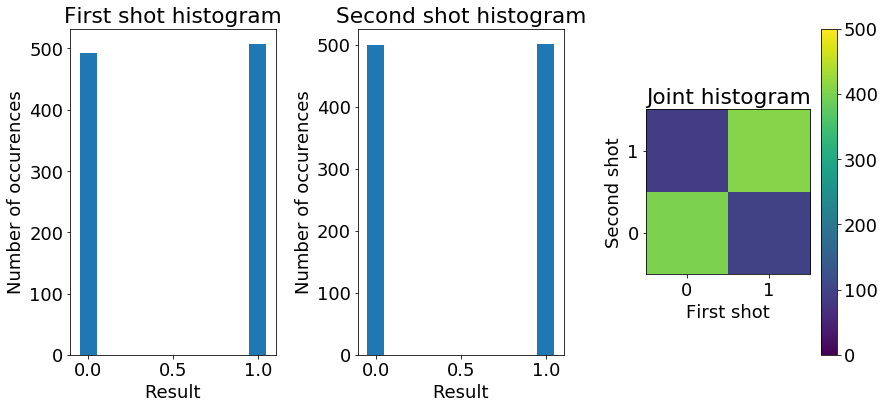

In [68]:
# Distribution parameter (first shot)
p1 = 0.5;
p2_score = 0.8;
p2_miss  = 0.2;

# Number of trials
N = 1000;
x1 = np.zeros((N))
x2 = np.zeros((N))

# Generate and show some data
for k in range(N):
    x1[k] = stats.bernoulli.rvs(p1, size=1)
    if x1[k] == 1:
        x2[k] = stats.bernoulli.rvs(p2_score, size=1)
    else:
        x2[k] = stats.bernoulli.rvs(p2_miss, size=1)

fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
plt.rc('font', **font)
plt.subplot(1,3,1) # Histogram of first shot
plt.title('First shot histogram')
_ = plt.hist(x1, bins=np.arange(-0.05,1.15,0.1))
plt.xlabel('Result');
plt.ylabel('Number of occurences');


plt.subplot(1,3,2) # Histogram of second shot
plt.title('Second shot histogram')
_ = plt.hist(x2, bins=np.arange(-0.05,1.15,0.1))
plt.xlabel('Result');
plt.ylabel('Number of occurences');


ax = plt.subplot(1,3,3) # Joint histogram
xedges = [-0.5, 0.5, 1.5]
yedges = [-0.5, 0.5, 1.5]
H, xedges, yedges = np.histogram2d(x1, x2,bins = (xedges,yedges))
H = H.T
plt.imshow(H, interpolation='nearest', origin='lower',vmin=0, vmax=N/2, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
ax.set_xticks([0,1])
ax.set_yticks([0,1])
plt.xlabel('First shot')
plt.ylabel('Second shot')
plt.title('Joint histogram')
plt.colorbar()



# Calculate sample mean and variance
smean1 = np.mean(x1)
svar1 = np.var(x1)

smean2 = np.mean(x2)
svar2 = np.var(x2)

print('Shot 1: Sample mean =       ' + str(smean1))
print('Shot 1: Sample mean =       ' + str(smean2) + '\n')

print('Shot 1: Sample variance =       ' + str(svar1))
print('Shot 2: Sample variance =       ' + str(svar2) + '\n')


print('Joint histogram')
print(str(H))


# Calculate marginal and conditional distributions (exercise)


### Example joint distribution (continuous)

Let us consider a pair of jointly distributed Gaussian random variables, with a given pair of means $\mathbf{\mu}$, and a given covariance matrix $\mathbf{C}$ (see below). This matrix contains the variance of each of our two Gaussians along the diagonal, and the covariance (next lecture) in the off-diagonal entries - note that this is by definition a hermitian symmetric matrix, ie: $\mathbf{C} = \mathbf{C}^T$. 


X1: Sample mean =       0.5008887760779664
X2: Sample mean =       -0.1994308672434211

X1: Sample variance =       2.001373958771123
X2: Sample variance =       1.4970848686642266



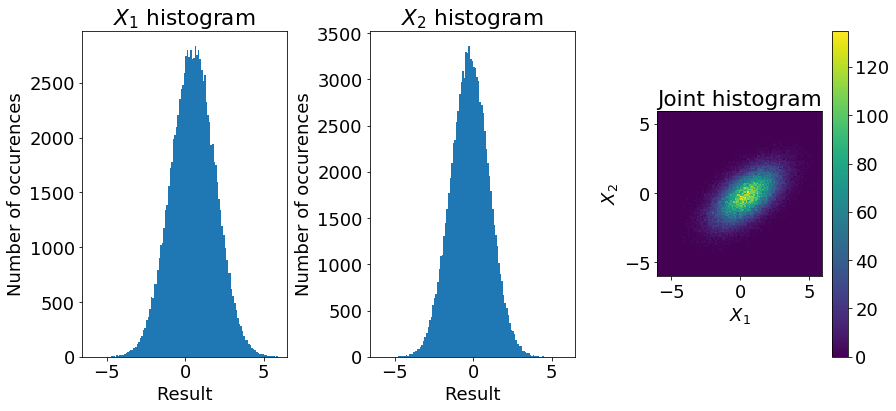

In [66]:
# Parameters
mu = [0.5, -0.2]
C = [[2.0, 1.0], [1.0, 1.5]]

# Number of trials
N = 100000;

# Generate random numbers
rv = stats.multivariate_normal.rvs(mu, C, size=N)

# Plot data
xvals = np.arange(-3*Cov[0][0],+3*Cov[0][0],0.1)
yvals = np.arange(-3*Cov[0][0],+3*Cov[0][0],0.1)

fig = plt.figure(figsize=(14,6))
fig.subplots_adjust(hspace=0.4,wspace=0.4)
plt.rc('font', **font)
plt.subplot(1,3,1) # Histogram of first shot
plt.title('$X_1$ histogram')
_ = plt.hist(rv[:,0], bins=xvals)
plt.xlabel('Result');
plt.ylabel('Number of occurences');


plt.subplot(1,3,2) # Histogram of second shot
plt.title('$X_2$ histogram')
_ = plt.hist(rv[:,1], bins=yvals)
plt.xlabel('Result');
plt.ylabel('Number of occurences');


ax = plt.subplot(1,3,3) # Joint histogram
H, xedges, yedges = np.histogram2d(rv[:,0], rv[:,1],bins = (xvals,yvals))
H = H.T
plt.imshow(H, interpolation='nearest', origin='lower',extent=[xvals[0], xvals[-1], yvals[0], yvals[-1]])
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Joint histogram')
plt.colorbar()


# Calculate sample mean and variance
smean1 = np.mean(rv[:,0])
svar1 = np.var(rv[:,0])

smean2 = np.mean(rv[:,1])
svar2 = np.var(rv[:,1])

print('X1: Sample mean =       ' + str(smean1))
print('X2: Sample mean =       ' + str(smean2) + '\n')

print('X1: Sample variance =       ' + str(svar1))
print('X2: Sample variance =       ' + str(svar2) + '\n')

# Calculate marginal and conditional distributions (exercise)


In [54]:
#aa = np.arange(mu[0]-5*Cov[0,0],mu[0]+5*Cov[0,0],0.1)


0.5